# Neural Network Learning
- Training data로부터 가중치(weight) 매개변수(parameter)의 최적값을 자동으로 획득하는 것
- 데이터 주도 학습
- Training Data
- Test Data
    - 범용능력을 평가하기 위해 
- Overfitting
    - 한 데이터셋에만 지나치게 최적화된 상태
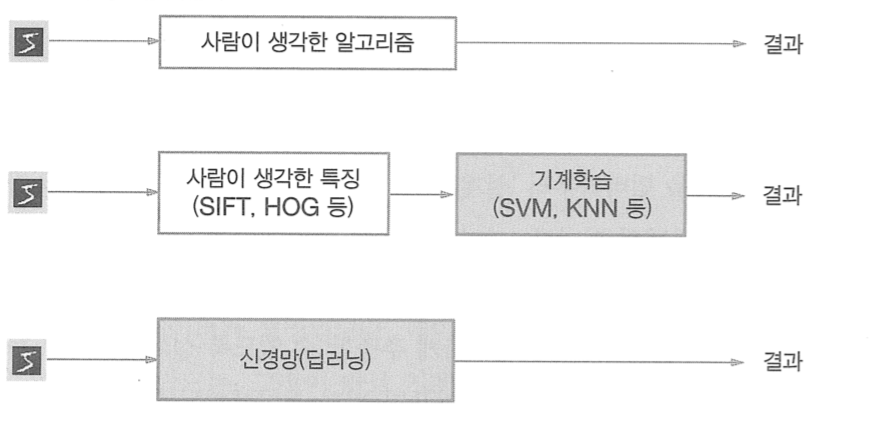

## Revisit to Cost Function
- How to minimize cost?
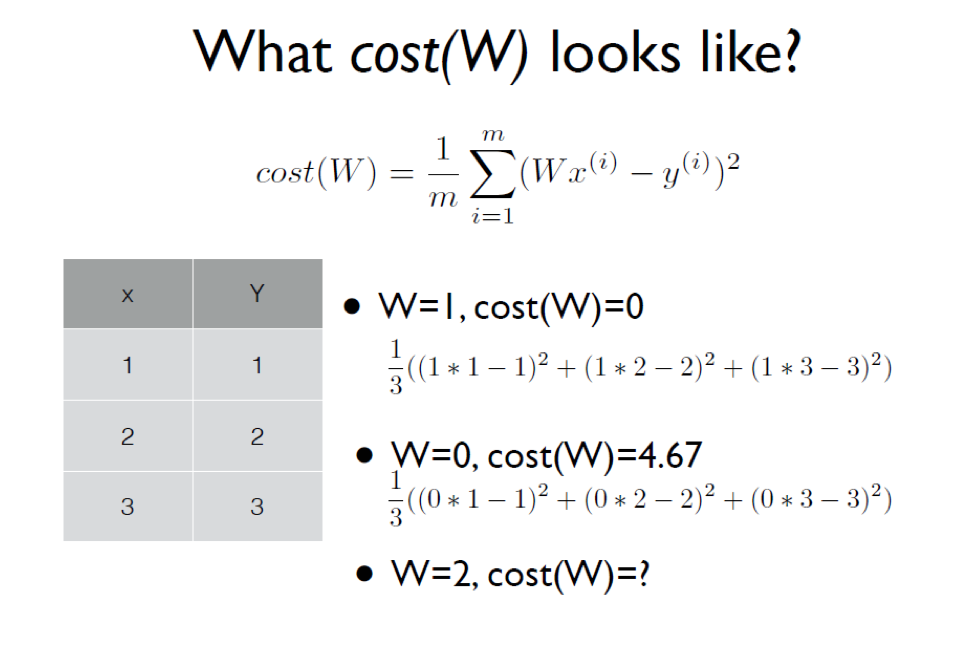
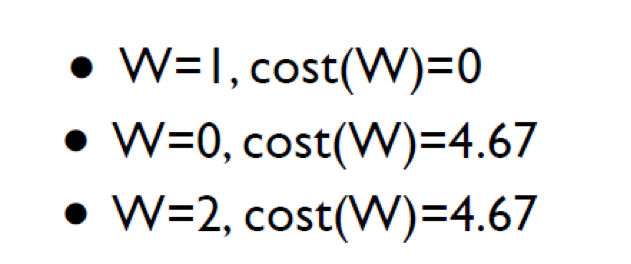

- How to minimize cost?
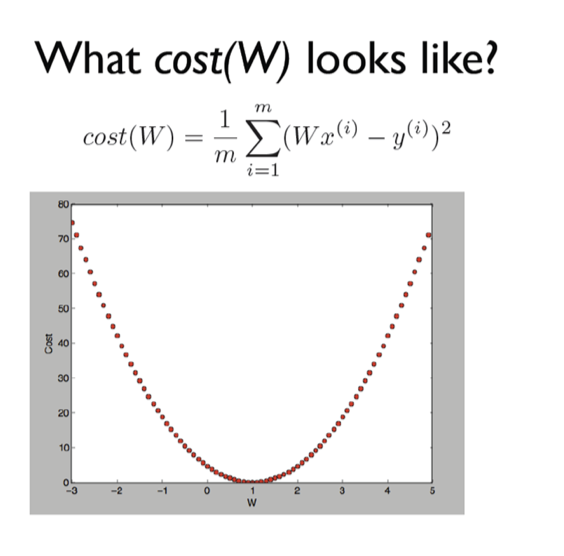

## Revisit to Logistic Regression
- Binary Classification
- Logistic Hypothesis : z = Wx + b,      g(z) -> 0 or 1
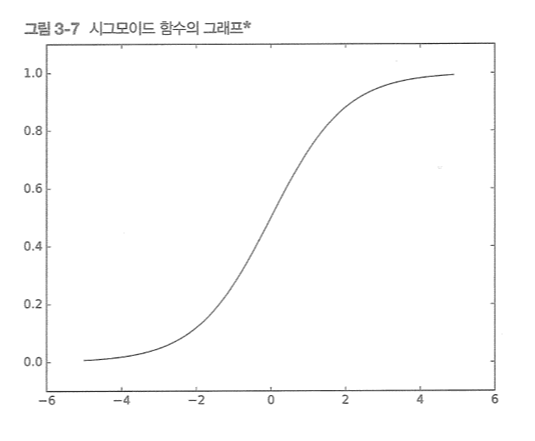
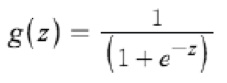
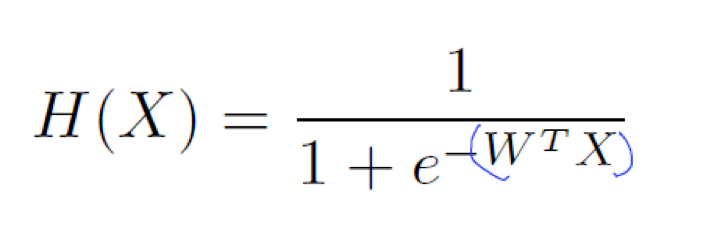
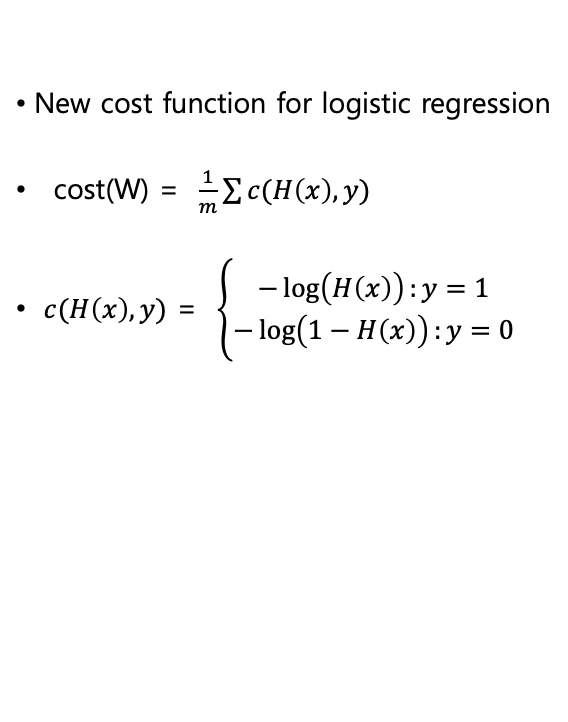
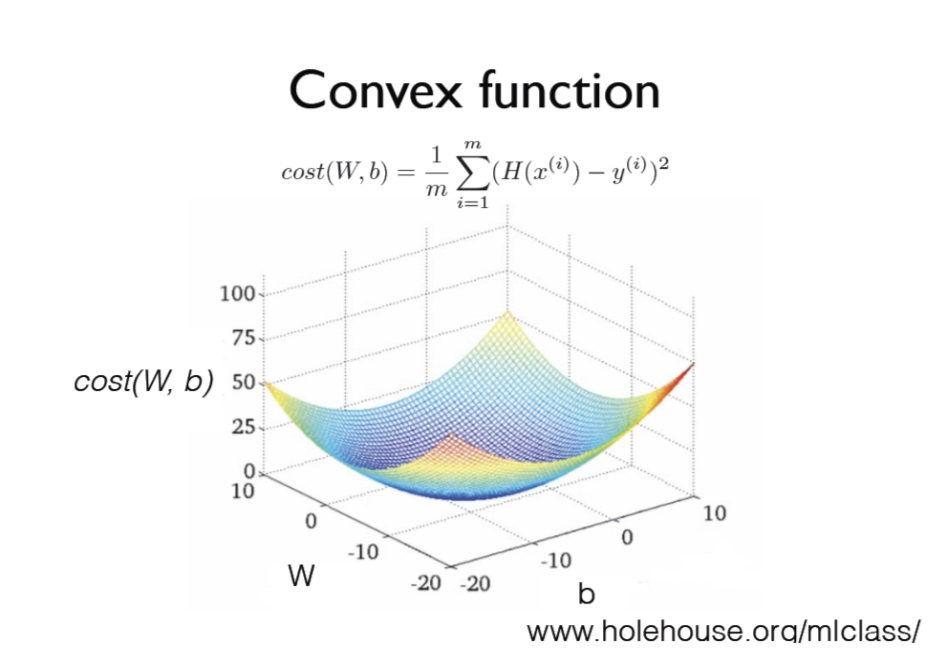

## Data Set
- https://tykimos.github.io/2017/03/25/Dataset_and_Fit_Talk/

## Loss Function
- 신경망 학습에서는 현재의 상태를 ‘하나의 지표’로 표현
    - 이 지표를 가장 좋게 만들어주는 가중치 매개변수의 값을 탐색
- 현재의 신경망이 훈련데이터를 얼마나 잘 처리하지 못하느냐
### 평균제곱오차(Mean Squrared Error, MSE)
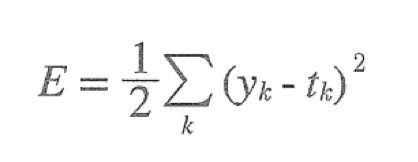

In [1]:
#yk 는 신경망의 출력
#t는 정답 레이블
import numpy as np
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]  #one hot encoding

def mean_squared_error(y, t):
    return 0.5 * np.sum((y-t)**2)

print(mean_squared_error(np.array(y), np.array(t)))

y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
print(mean_squared_error(np.array(y), np.array(t)))

0.09750000000000003
0.5975


## Cross Entropy Loss
- Tk가 1일 때의 yk의 자연로그 계산
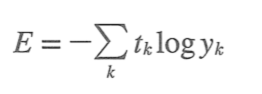

- cf) same as our previous J(w) 
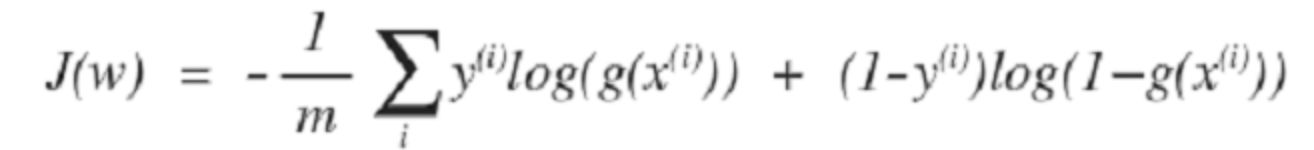
- 자연로그 *y = logx*의 그래프
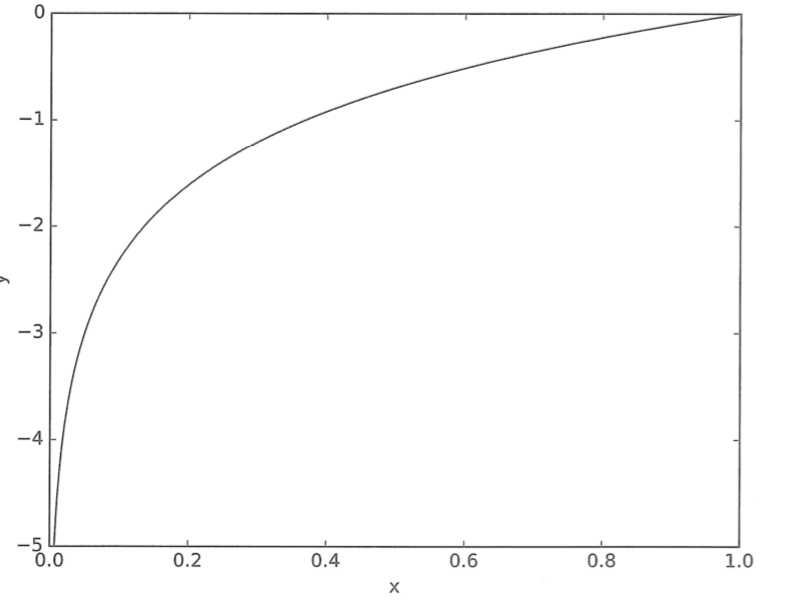

In [78]:
import numpy as np
#def cross_entropy_error(y, t):
#    delta = 1e-7              # to avoid np.log(0) --> -inf
#    return -np.sum(t * np.log(y+delta))  

def cross_entropy_error(y, t):
    delta = 1e-7              # to avoid np.log(0) --> -inf
    return -(1/len(y))*np.sum((t * np.log(y+delta)) + ((1-t)*np.log(1-(y+delta))))

y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

print(cross_entropy_error(np.array(y), np.array(t)))

y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
print(cross_entropy_error(np.array(y), np.array(t)))

0.09294945367076167
0.35321835277080676


## Mini-batch Learning
- 많은 데이터에서 손실 함수를 모두 계산하는 것은 시간이 오래 걸림
- 훈련 데이터에서 일정수를 무작위로 뽑아 학습 -> mini-batch
- 평균손실함수 : N 개으 데이터로 나누어 손실 함수를 구함
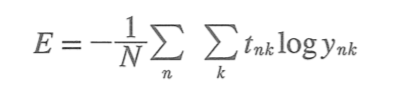

- 그러나 모든 데이터를 대상으로 손실함수의 합을 구하려면 시간이 걸림.
- 이 경우 데이터 일부를 추려 전체의 '근사치'로 이용. 신경망 학습에서도 훈련 데이터로부터 일부만 골라 학습을 수행
- 이를 미니배치 학습

In [2]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

print(x_train.shape)
print(t_train.shape)

(60000, 784)
(60000, 10)


In [7]:
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

print(x_batch.size)

np.random.choice(60000,10) #60,000 개중 랜덤으로 10개의 인덱스 추출


7840


array([16314, 22569, 35231, 53347, 16885, 21539,  9821, 48084, 51748,
       42611])

## Why Loss Function?
- 높은 Accuarcy를 끌어내는 매개변수 값을 찾는 것
- 최적의 매개변수(가중치와 편향) -> 손실값을 가능한 한 작게 하는 매개변수를 찾는 것
    - 미분을 사용
    - 가중치 매개 변수의 값을 아주 조금 변화시켰을 때 손실 함수가 어떻게 변화하는지
    - 미분이 음수이면 가중치 매개변수를 양의 방향으로 변화시켜 손실 함수의 값을 줄임, 양수면 반대로 음의 방향으로 변화시켜 손실함수의 값을 줄임
    - 미분 값이 0이면 가중치 매개변수를 어느 쪽으로 움직여도 손실 함수의 값은 달라지지 않음. -> 가중치 매개변수의 갱신 중단

In [30]:
# coding: utf-8
import numpy as np
import matplotlib.pylab as plt

## Differentiation
- ‘특정 순간’의 변화량
- *f(x)*의 x에 대한 미분
- x의 작은 변화가 함수 f(x)를 얼마나 변화시키느냐를 의미
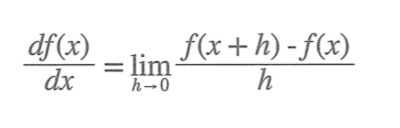
- 수치미분(numerical differentiation)
    - 작은 차분으로 미분을 구하는 방법
    - 반올림 오차(rounding error): 작은값이 생략되어 최종 결과에 오차
    - 차분 오차 : 중심차분, 전방차분 
    
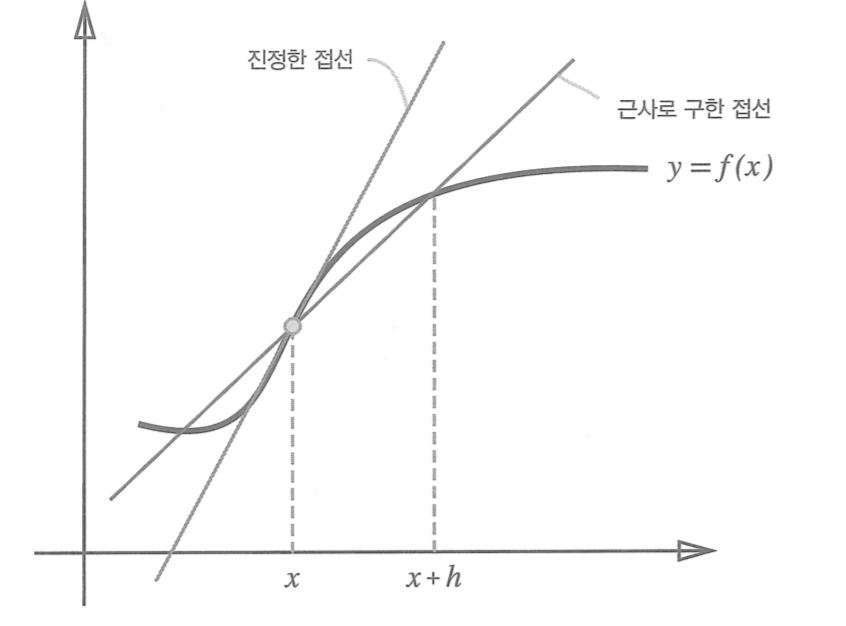

0.1999999999990898


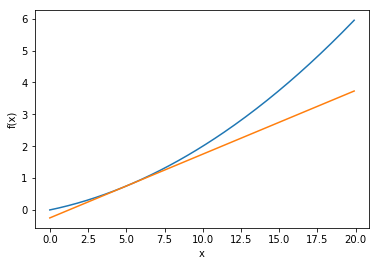

In [11]:
import matplotlib.pyplot as plt
def numerical_diff(f, x):
    h = 1e-4 # 0.0001
    #h = 1e-50  # for rounding error
    return (f(x+h) - f(x-h)) / (2*h)  # 중심차분, 중앙 차분을 이용
    #return (f(x+h)-f(x)) / h   # 원래 수치미분..


#ㅛ = 0.01x^2+0.1x
def function_1(x):
    return 0.01*x**2 + 0.1*x


def tangent_line(f, x):
    d = numerical_diff(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y

x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")

#x=5일 떄 이 함수의 미분
#해석적 미분은 0.02x+0.1
#따라서 x=5일 때 0.2
tf = tangent_line(function_1, 5)
y2 = tf(x)

plt.plot(x, y)
plt.plot(x, y2)
plt.show()

## 편미분
- 변수가 여럿인 함수인 경우 각 변수에 대한 미분은 그 변수를 고정시키고 미분 -> 편미분
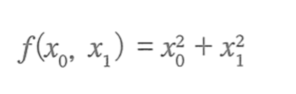
- 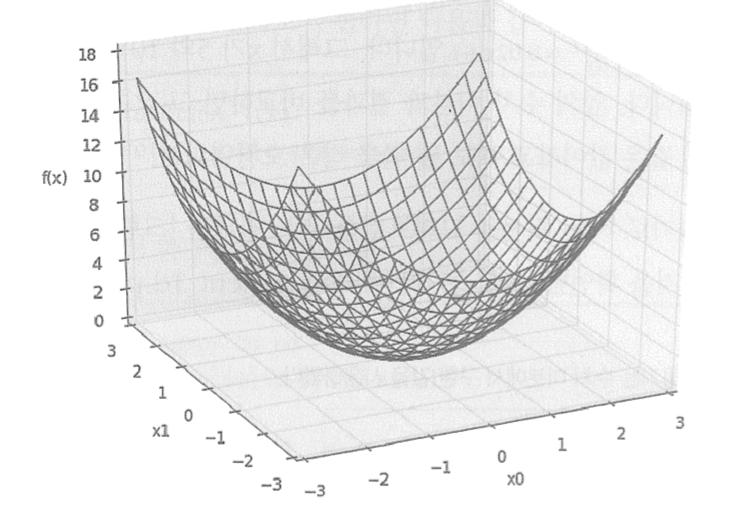

## 기울기(Gradient)
- 두 변수의 편미분을 동시에 계산-> 모든 변수의 편미분을 벡터로 정리한 것을 기울기
- 기울기는 함수의 ‘가장 낮은 장소(최소값)’을 가리킴
- 가장 낮은 곳에서 멀어질수록 화살표 크기가 커짐
- 기울기가 가리키는 쪽은 각 장소에서 함수의 출력 값을 가장 줄이는 방향

In [12]:

# coding: utf-8
# cf.http://d.hatena.ne.jp/white_wheels/20100327/p3
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D


def _numerical_gradient_no_batch(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x) # x와 형상이 같은 배열을 생성

    for idx in range(x.size):
        tmp_val = x[idx]

        # f(x+h) 계산
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)

        # f(x-h) 계산
        x[idx] = tmp_val - h
        fxh2 = f(x)

        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val # 값 복원

    return grad


def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)

        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)

        return grad


def function_2(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1)




In [13]:
print(numerical_gradient(function_2, np.array([3.0, 4.0])))
print(numerical_gradient(function_2, np.array([0.0, 2.0])))
print(numerical_gradient(function_2, np.array([3.0, 0.0])))

[6. 8.]
[0. 4.]
[6. 0.]


No handles with labels found to put in legend.


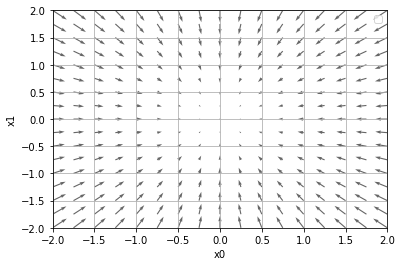

In [14]:
def tangent_line(f, x):
    d = numerical_gradient(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y

if __name__ == '__main__':
    x0 = np.arange(-2, 2.5, 0.25)
    x1 = np.arange(-2, 2.5, 0.25)
    X, Y = np.meshgrid(x0, x1)
   # print(X)
   # print(Y)
    
    X = X.flatten()
    Y = Y.flatten()

    grad = numerical_gradient(function_2, np.array([X, Y]) )

    plt.figure()
    plt.quiver(X, Y, -grad[0], -grad[1],  angles="xy",color="#666666")#,headwidth=10,scale=40,color="#444444")
    plt.xlim([-2, 2])
    plt.ylim([-2, 2])
    plt.xlabel('x0')
    plt.ylabel('x1')
    plt.grid()
    plt.legend()
    plt.draw()
    plt.show()

[[0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]]
[[0 0 0 0 0]
 [1 1 1 1 1]
 [2 2 2 2 2]
 [3 3 3 3 3]
 [4 4 4 4 4]]


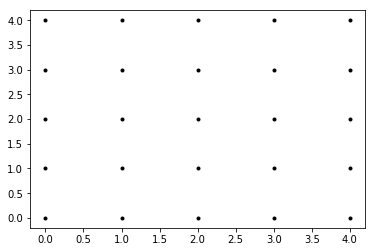

In [7]:
## To check meshgrid above
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

xvalues = np.array([0, 1, 2, 3, 4])
yvalues = np.array([0, 1, 2, 3, 4])
xx, yy = np.meshgrid(xvalues, yvalues)
print(xx)
print(yy)
plt.plot(xx, yy, marker='.', color='k', linestyle='none')

## 경사하강법(Gradient Descent Method)
- 학습단계에서 최적의 매개변수 찾기 -> loss function이 최소가 될 때의 매개변수 값
- 현 위치에서 기울어진 방향으로 일정 거리만큼 이동. 다시 이동한 곳에서도 마찬가지로 기울기를 구하고, 또 그 기울어진 방향으로 나아가는 일을 반복
- cf) Plateau
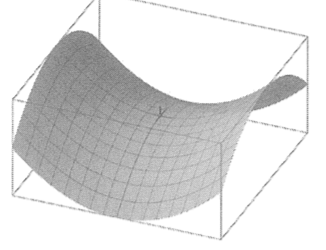
- 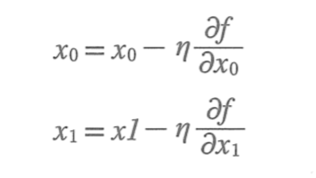
- 학습률(learning rate)
    - 특정의 값으로 미리 정함 (hyper parameter)-0.01, 0.001
    - 이 값이 너무 크거나 작으면 최적화 되기 어려움
    - 이 학습률을 변경하면서 올바르게 학습하고 있는지 확인하면서 진행
    - 학습률이 너무 크면 큰 값으로 발산해 버리고, 너무 작으면 거의 갱신되지 않음 -> 학습률을 적절히 설정하는 것이 중요

In [15]:
#경사하강법
#초긱랎에 따른 경사 갱신과정

def _numerical_gradient_no_batch(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x) # x와 형상이 같은 배열을 생성

    for idx in range(x.size):
        tmp_val = x[idx]

        # f(x+h) 계산
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)

        # f(x-h) 계산
        x[idx] = tmp_val - h
        fxh2 = f(x)

        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val # 값 복원

    return grad


def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)

        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)

        return grad

In [21]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []

    for i in range(step_num):
        x_history.append( x.copy() )

        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x, np.array(x_history)


def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])

lr = 0.1
step_num = 20
x, x_history = gradient_descent(function_2, init_x, lr=lr, step_num=step_num)


print (x)
print (x_history)

[-0.03458765  0.04611686]
[[-3.          4.        ]
 [-2.4         3.2       ]
 [-1.92        2.56      ]
 [-1.536       2.048     ]
 [-1.2288      1.6384    ]
 [-0.98304     1.31072   ]
 [-0.786432    1.048576  ]
 [-0.6291456   0.8388608 ]
 [-0.50331648  0.67108864]
 [-0.40265318  0.53687091]
 [-0.32212255  0.42949673]
 [-0.25769804  0.34359738]
 [-0.20615843  0.27487791]
 [-0.16492674  0.21990233]
 [-0.1319414   0.17592186]
 [-0.10555312  0.14073749]
 [-0.08444249  0.11258999]
 [-0.06755399  0.09007199]
 [-0.0540432   0.07205759]
 [-0.04323456  0.05764608]]


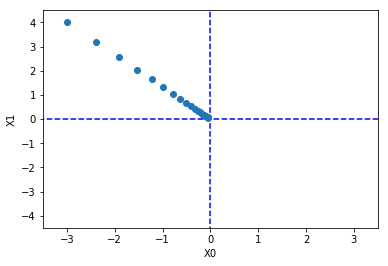

In [22]:
# 경사법을 이용한 갱신과정을 그림으로 나타냄
plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()

In [23]:
#학습률이 너무 큰 예: lr=10.0 -큰 값으로 발산
init_x = np.array([-3.0, 4.0])

x, x_hist = gradient_descent(function_2, init_x=init_x, lr=10.0, step_num=step_num)
print (x)

[-2.58983747e+13 -1.29524862e+12]


In [24]:
#학습률이 너무 작은 예: lr=1e-10 --> 거의 갱신되지 않음
init_x = np.array([-3.0, 4.0])

x, x_hist = gradient_descent(function_2, init_x=init_x, lr=1e-10, step_num=step_num)
print (x)

[-2.99999999  3.99999998]


## 신경망에서의 기울기
- 신경망 학습에서의 기울기
- 가중치 매개변수에 관한 손실함수의 기울기

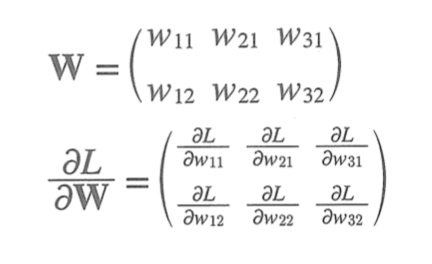


In [25]:
#신경망에서의 기울기
#이를 바탕으로 한 simpleNet 클래스 구현 및 가중치 매개변수 

#신경망에서 기울기

def softmax(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T

    x = x - np.max(x) # 오버플로 대책
    return np.exp(x) / np.sum(np.exp(x))
def sigmoid_grad(x):
    return (1.0 - sigmoid(x)) * sigmoid(x)

def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)

    # 훈련 데이터가 원-핫 벡터라면 정답 레이블의 인덱스로 반환
    if t.size == y.size:
        t = t.argmax(axis=1)

    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size
#----------------------------------------------------------------------------
#실제 기울기를 구하는 코드 
class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3) # 정규분포로 초기화

    def predict(self, x):
        return np.dot(x, self.W)

    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)

        return loss

x = np.array([0.6, 0.9])
t = np.array([0, 0, 1])

net = simpleNet()
print("Weight", net.W)
print("Predict", net.predict(x))
print("Loss", net.loss(x, t))

Weight [[-2.57147215e-01 -8.38539773e-02  7.58521445e-04]
 [-8.67650993e-01  8.18272096e-01  1.28282244e-01]]
Predict [-0.93517422  0.6861325   0.11590913]
Loss 1.1372623082579596


In [26]:
# 기울기
#def f(W):
 #   return net.loss(x, t)
f = lambda w: net.loss(x,t)
dw = numerical_gradient(f, net.W)
print(dw)

[[ 0.06726119  0.34032127 -0.40758246]
 [ 0.10089178  0.51048191 -0.61137369]]


## Learning Algorithm
- 신경망 학습절차	
    - 전제: 신경망에는 적용 가능한 가중치와 편향이 있고, 이 가중치와 편향을 훈련 데이터에 적응하도록 조정하는 과정이 학습
    - 1단계: 미니배치: 훈련 데이터 중 일부를 무작위로 가져옵니다. 이를 미니배치라고 하고, 미니배치의 손실 함수 값을 줄이는 것을 목표로 함
    - 2단계: 기울기 산출: 미니배치의 손실 함수 값을 줄이기 위해 각 가중치 매개변수의 기울기를 구함. 기울기는 손실함수의 값을 가장 작게 하는 방향을 제시
    - 3단계: 매개변수 갱신: 가중치 매개변수를 기울기 방향으로 아주 조금 갱신
    - 4단계: 반복: 1~3단계를 반복
- 확률적 경사하강법(Stochastic Gradient Descent, SGD): 데이터를 미니배티로 무작위로 선정하기 때문에 확률적 경사하강법이라 함. 확률적으로 무작위로 골라낸 데이터에 대해 수행하는 경사 하강법

## Two Layer Net

In [46]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
from common.functions import *
from common.gradient import numerical_gradient


class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']

        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)

        return y

    # x : 입력 데이터, t : 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)

        return cross_entropy_error(y, t)

    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)

        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy

    # x : 입력 데이터, t : 정답 레이블
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)

        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])

        return grads

    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}

        batch_num = x.shape[0]

        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)

        # backward
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)

        da1 = np.dot(dy, W2.T)
        dz1 = sigmoid_grad(a1) * da1
        grads['W1'] = np.dot(x.T, dz1)
        grads['b1'] = np.sum(dz1, axis=0)

        return grads

## Mini-Batch Learning Implementation
- ch04/train_neuralnet.py

train acc, test acc | 0.09751666666666667, 0.0974
train acc, test acc | 0.7804333333333333, 0.7867
train acc, test acc | 0.8781, 0.8832
train acc, test acc | 0.8994833333333333, 0.9031
train acc, test acc | 0.9089333333333334, 0.913
train acc, test acc | 0.9160666666666667, 0.9181
train acc, test acc | 0.92065, 0.9233
train acc, test acc | 0.9245333333333333, 0.927
train acc, test acc | 0.9278833333333333, 0.9302
train acc, test acc | 0.9314166666666667, 0.9315
train acc, test acc | 0.9342166666666667, 0.9343
train acc, test acc | 0.9359666666666666, 0.9346
train acc, test acc | 0.9389666666666666, 0.9381
train acc, test acc | 0.9415, 0.9417
train acc, test acc | 0.9437166666666666, 0.9425
train acc, test acc | 0.9454333333333333, 0.9447
train acc, test acc | 0.9474333333333333, 0.9466


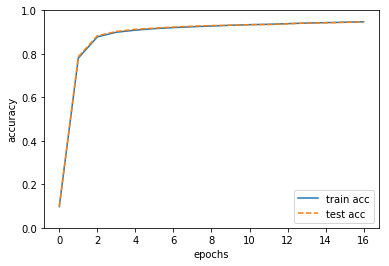

In [64]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
#from two_layer_net import TwoLayerNet

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

# 하이퍼파라미터
iters_num = 10000  # 반복 횟수를 적절히 설정한다.
train_size = x_train.shape[0]
batch_size = 100   # 미니배치 크기
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1에폭당 반복 수
iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    # 기울기 계산
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)

    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]

    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

    # 1에폭당 정확도 계산
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

# 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()